In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# **Thực hiện thuật toán theo tỉ lệ 8:2 (80% train : 20% test)**

In [ ]:
df_gold = pd.read_csv(r'/content/gold_price_2018_2024.csv')

In [ ]:
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold['Day Number'] = df_gold['Date'].rank(method='dense').astype(int)
#df_gold['100 Day Ago Price'] = df_gold['Value (USD per troy ounce)'].shift(100)
#df_gold.columns = ['Date','Price','Day Number', '100 Day Ago Price']
df_gold.columns = ['Date','Price','Day Number']
df_gold = df_gold.dropna()
df_gold

,Date,Price,Day Number
0,2018-01-01,1307.018690,1
1,2018-01-02,1319.827953,2
2,2018-01-03,1311.501862,3
3,2018-01-04,1321.635371,4
4,2018-01-05,1319.589185,5
...,...,...,...
2247,2024-02-26,2031.609404,2248
2248,2024-02-27,2033.313814,2249
2249,2024-02-28,2032.653770,2250
2250,2024-02-29,2036.199141,2251


In [ ]:
train_data = df_gold.iloc[:1800]
#train_data.columns = ['Date','Train Price','Day Number', '100 Day Ago Price']
train_data.columns = ['Date','Train Price','Day Number']
test_data = df_gold.iloc[1800:]
#test_data.columns = ['Date','Actual Price','Day Number', '100 Day Ago Price']
test_data.columns = ['Date','Actual Price','Day Number']

In [ ]:
#X_train = train_data[['Day Number', '100 Day Ago Price']]
X_train = train_data[['Day Number']]
X_train = sm.add_constant(X_train)
Y_train = train_data['Train Price']
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Train Price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     4470.
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        16:41:55   Log-Likelihood:                -11349.
No. Observations:                1800   AIC:                         2.270e+04
Df Residuals:                    1798   BIC:                         2.271e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1242.8786      6.248    198.940      0.0

In [ ]:
#X_test = test_data[['Day Number', '100 Day Ago Price']]
X_test = test_data[['Day Number']]
X_test_array = X_test.to_numpy()
X1 = X_test_array[:, 0]
#X2 = X_test_array[:, 1]
#Y_predict = 452.1869 + 0.1281 * X1 + 0.6565 * X2

Y_predict = 1242.8786 + 0.4018 * X1
test_data.insert(1, "Price Predict", Y_predict)
test_data

,Date,Price Predict,Actual Price,Day Number
1800,2022-12-06,1966.5204,1772.210045,1801
1801,2022-12-07,1966.9222,1787.139849,1802
1802,2022-12-08,1967.3240,1789.106560,1803
1803,2022-12-09,1967.7258,1797.159948,1804
1804,2022-12-10,1968.1276,1796.469363,1805
...,...,...,...,...
2247,2024-02-26,2146.1250,2031.609404,2248
2248,2024-02-27,2146.5268,2033.313814,2249
2249,2024-02-28,2146.9286,2032.653770,2250
2250,2024-02-29,2147.3304,2036.199141,2251


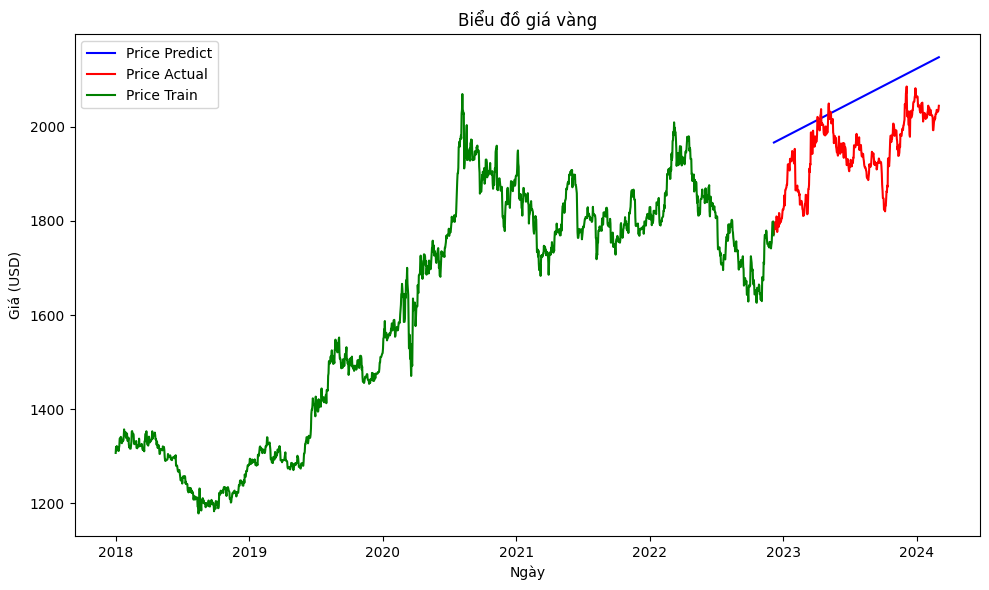

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Price Predict'], label='Price Predict', color='blue')
plt.plot(test_data['Date'], test_data['Actual Price'], label='Price Actual', color='red')
plt.plot(train_data['Date'], train_data['Train Price'], label='Price Train', color='green')

plt.title('Biểu đồ giá vàng')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Đánh giá mô hình với dữ liệu giá vàng
actual_gold = test_data['Actual Price'].values
predict_gold = test_data['Price Predict'].values

rmse_gold = np.sqrt(mean_squared_error(actual_gold, predict_gold))
mape_gold = np.mean(np.abs((actual_gold - predict_gold) / actual_gold)) * 100
mae_gold = mean_absolute_error(actual_gold, predict_gold)

print(f'RMSE: {rmse_gold}')
print(f'MAPE: {mape_gold}%')
print(f'MAE: {mae_gold}')

RMSE: 121.98656247761342
MAPE: 5.707994032955856%
MAE: 109.63297948451327


                            OLS Regression Results                            
Dep. Variable:            Train Price   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     412.0
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.23e-82
Time:                        16:48:02   Log-Likelihood:                -10905.
No. Observations:                1800   AIC:                         2.181e+04
Df Residuals:                    1798   BIC:                         2.182e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        848.7788      4.883    173.827      0.0

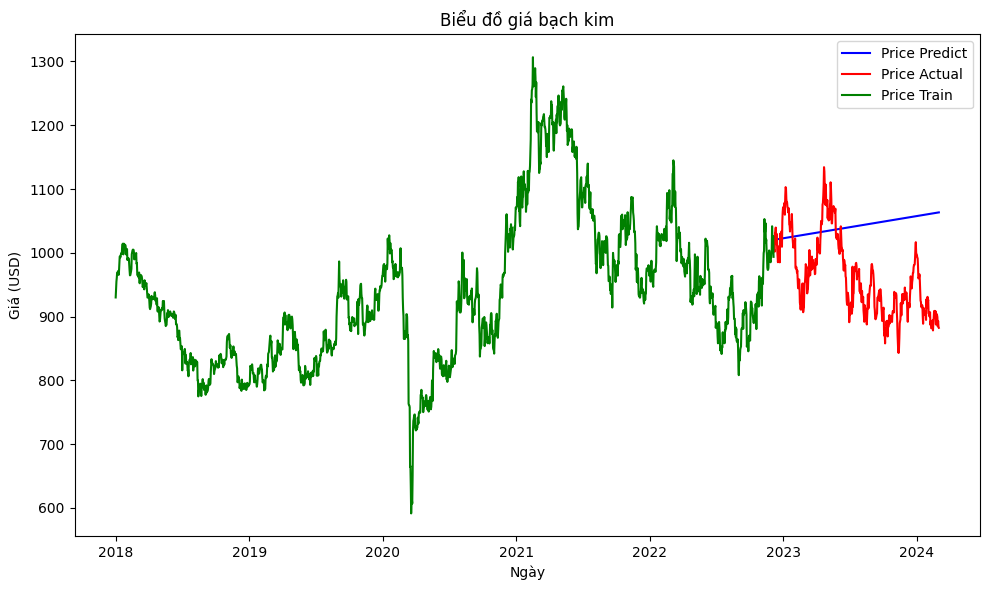

In [ ]:
df_platium = pd.read_csv(r'/content/platium_price_2018_2024.csv')
df_platium['Date'] = pd.to_datetime(df_platium['Date'])
df_platium['Day Number'] = df_platium['Date'].rank(method='dense').astype(int)
#df_platium['100 Day Ago Price'] = df_platium['Value (USD per troy ounce)'].shift(100)
#df_platium.columns = ['Date','Price','Day Number', '100 Day Ago Price']
df_platium.columns = ['Date','Price','Day Number']
df_platium = df_platium.dropna()

train_data = df_platium.iloc[:1800]
#train_data.columns = ['Date','Train Price','Day Number', '100 Day Ago Price']
train_data.columns = ['Date','Train Price','Day Number']
test_data = df_platium.iloc[1800:]
#test_data.columns = ['Date','Actual Price','Day Number', '100 Day Ago Price']
test_data.columns = ['Date','Actual Price','Day Number']

#X_train = train_data[['Day Number', '100 Day Ago Price']]
X_train = train_data[['Day Number']]
X_train = sm.add_constant(X_train)
Y_train = train_data['Train Price']
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

#X_test = test_data[['Day Number', '100 Day Ago Price']]
X_test = test_data[['Day Number']]
X_test_array = X_test.to_numpy()
X1 = X_test_array[:, 0]
#X2 = X_test_array[:, 1]
#Y_predict = 516.0638 + 0.0797 * X1 + 0.3644 * X2
Y_predict = 848.7788 + 0.0953 * X1

test_data.insert(1, "Price Predict", Y_predict)

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Price Predict'], label='Price Predict', color='blue')
plt.plot(test_data['Date'], test_data['Actual Price'], label='Price Actual', color='red')
plt.plot(train_data['Date'], train_data['Train Price'], label='Price Train', color='green')

plt.title('Biểu đồ giá bạch kim')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Đánh giá mô hình với dữ liệu giá bạch kim
actual_platium = test_data['Actual Price'].values
predict_platium = test_data['Price Predict'].values

rmse_platium = np.sqrt(mean_squared_error(actual_platium, predict_platium))
mape_platium = np.mean(np.abs((actual_platium - predict_platium) / actual_platium)) * 100
mae_platium = mean_absolute_error(actual_platium, predict_platium)

print(f'RMSE: {rmse_platium}')
print(f'MAPE: {mape_platium}%')
print(f'MAE: {mae_platium}')

RMSE: 104.99560315020335
MAPE: 9.752510497217198%
MAE: 90.71843615862834


                            OLS Regression Results                            
Dep. Variable:            Train Price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     1598.
Date:                Tue, 14 May 2024   Prob (F-statistic):          1.47e-250
Time:                        16:48:47   Log-Likelihood:                -4610.1
No. Observations:                1800   AIC:                             9224.
Df Residuals:                    1798   BIC:                             9235.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7059      0.148     99.452      0.0

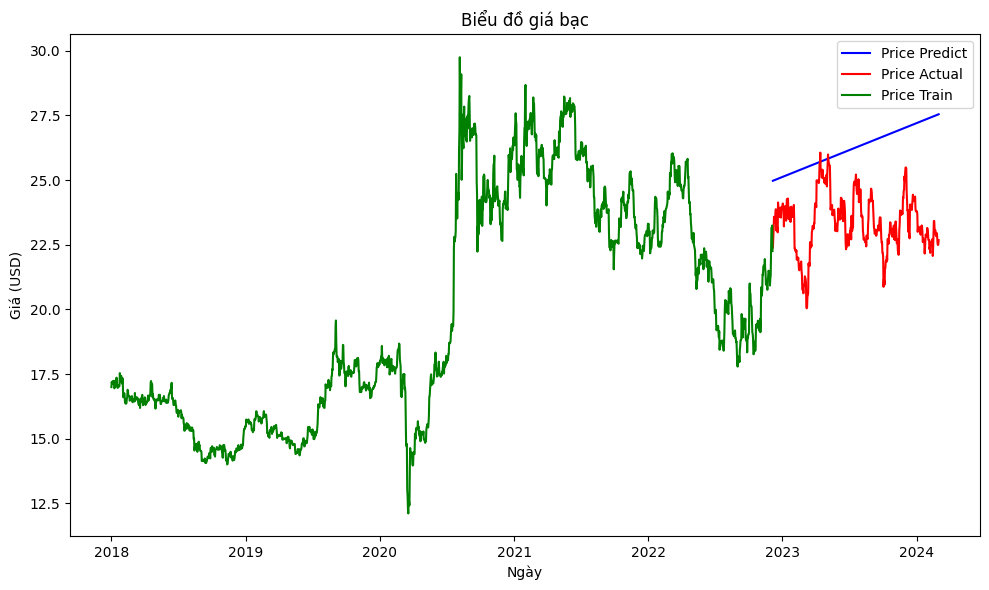

In [ ]:
df_silver = pd.read_csv(r'/content/silver_price_2018_2024.csv')
df_silver['Date'] = pd.to_datetime(df_silver['Date'])
df_silver['Day Number'] = df_silver['Date'].rank(method='dense').astype(int)
#df_silver['100 Day Ago Price'] = df_silver['Value (USD per troy ounce)'].shift(100)
#df_silver.columns = ['Date','Price','Day Number', '100 Day Ago Price']
df_silver.columns = ['Date','Price','Day Number']
df_silver = df_silver.dropna()


train_data = df_silver.iloc[:1800]
#train_data.columns = ['Date','Train Price','Day Number', '100 Day Ago Price']
train_data.columns = ['Date','Train Price','Day Number']
test_data = df_silver.iloc[1800:]
#test_data.columns = ['Date','Actual Price','Day Number', '100 Day Ago Price']
test_data.columns = ['Date','Actual Price','Day Number']


#X_train = train_data[['Day Number', '100 Day Ago Price']]
X_train = train_data[['Day Number']]
X_train = sm.add_constant(X_train)
Y_train = train_data['Train Price']
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

#X_test = test_data[['Day Number', '100 Day Ago Price']]
X_test = test_data[['Day Number']]
X_test_array = X_test.to_numpy()
X1 = X_test_array[:, 0]
#X2 = X_test_array[:, 1]
Y_predict = 14.7059 + 0.0057 * X1

test_data.insert(1, "Price Predict", Y_predict)

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Price Predict'], label='Price Predict', color='blue')
plt.plot(test_data['Date'], test_data['Actual Price'], label='Price Actual', color='red')
plt.plot(train_data['Date'], train_data['Train Price'], label='Price Train', color='green')

plt.title('Biểu đồ giá bạc')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Đánh giá mô hình với dữ liệu giá bạc
actual_silver = test_data['Actual Price'].values
predict_silver = test_data['Price Predict'].values

rmse_silver = np.sqrt(mean_squared_error(actual_silver, predict_silver))
mape_silver = np.mean(np.abs((actual_silver - predict_silver) / actual_silver)) * 100
mae_silver = mean_absolute_error(actual_silver, predict_silver)

print(f'RMSE: {rmse_silver}')
print(f'MAPE: {mape_silver}%')
print(f'MAE: {mae_silver}')

RMSE: 3.203661300440651
MAPE: 12.711089757583869%
MAE: 2.9094488733185844


# **Thực hiện thuật toán theo tỉ lệ 7:3 (70% train : 30% test)**

                            OLS Regression Results                            
Dep. Variable:            Train Price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     6903.
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        09:49:54   Log-Likelihood:                -9645.3
No. Observations:                1576   AIC:                         1.929e+04
Df Residuals:                    1574   BIC:                         1.931e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1183.4660      5.552    213.174      0.0

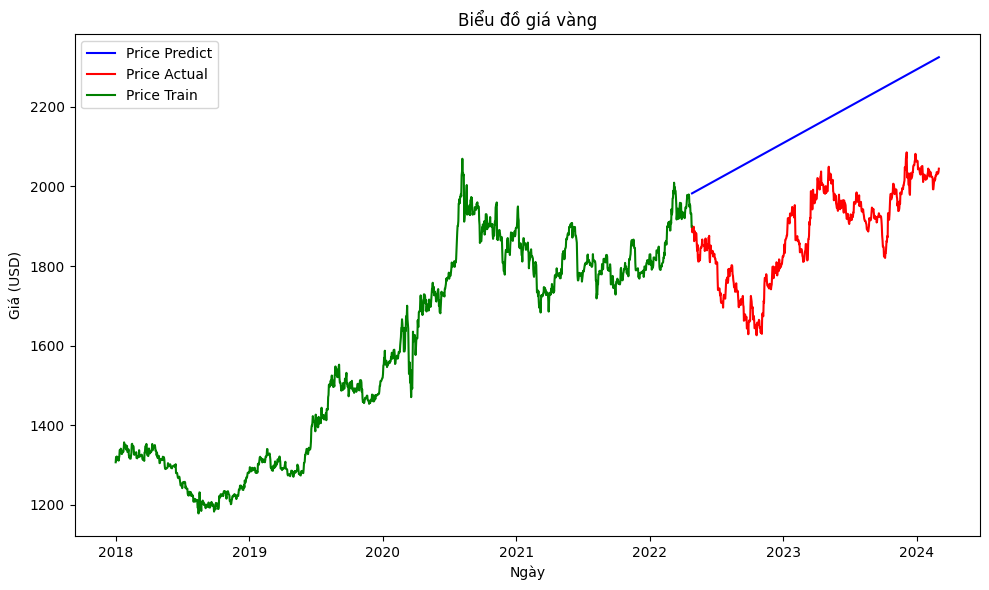

In [3]:
df_gold = pd.read_csv(r'/content/gold_price_2018_2024.csv')

df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold['Day Number'] = df_gold['Date'].rank(method='dense').astype(int)
#df_gold['100 Day Ago Price'] = df_gold['Value (USD per troy ounce)'].shift(100)
#df_gold.columns = ['Date','Price','Day Number', '100 Day Ago Price']
df_gold.columns = ['Date','Price','Day Number']
df_gold = df_gold.dropna()

train_data = df_gold.iloc[:1576]
#train_data.columns = ['Date','Train Price','Day Number', '100 Day Ago Price']
train_data.columns = ['Date','Train Price','Day Number']
test_data = df_gold.iloc[1576:]
#test_data.columns = ['Date','Actual Price','Day Number', '100 Day Ago Price']
test_data.columns = ['Date','Actual Price','Day Number']

#X_train = train_data[['Day Number', '100 Day Ago Price']]
X_train = train_data[['Day Number']]
X_train = sm.add_constant(X_train)
Y_train = train_data['Train Price']
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

#X_test = test_data[['Day Number', '100 Day Ago Price']]
X_test = test_data[['Day Number']]
X_test_array = X_test.to_numpy()
X1 = X_test_array[:, 0]
#X2 = X_test_array[:, 1]

Y_predict = 1183.4660 + 0.5067 * X1
test_data.insert(1, "Price Predict", Y_predict)

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Price Predict'], label='Price Predict', color='blue')
plt.plot(test_data['Date'], test_data['Actual Price'], label='Price Actual', color='red')
plt.plot(train_data['Date'], train_data['Train Price'], label='Price Train', color='green')

plt.title('Biểu đồ giá vàng')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
# Đánh giá mô hình với dữ liệu giá vàng
actual_gold = test_data['Actual Price'].values
predict_gold = test_data['Price Predict'].values

rmse_gold = np.sqrt(mean_squared_error(actual_gold, predict_gold))
mape_gold = np.mean(np.abs((actual_gold - predict_gold) / actual_gold)) * 100
mae_gold = mean_absolute_error(actual_gold, predict_gold)

print(f'RMSE: {rmse_gold}')
print(f'MAPE: {mape_gold}%')
print(f'MAE: {mae_gold}')

RMSE: 279.000030439287
MAPE: 14.453846412998525%
MAE: 268.78261586538457


                            OLS Regression Results                            
Dep. Variable:            Train Price   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     695.8
Date:                Wed, 15 May 2024   Prob (F-statistic):          2.74e-127
Time:                        09:50:45   Log-Likelihood:                -9506.3
No. Observations:                1576   AIC:                         1.902e+04
Df Residuals:                    1574   BIC:                         1.903e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        819.7464      5.083    161.270      0.0

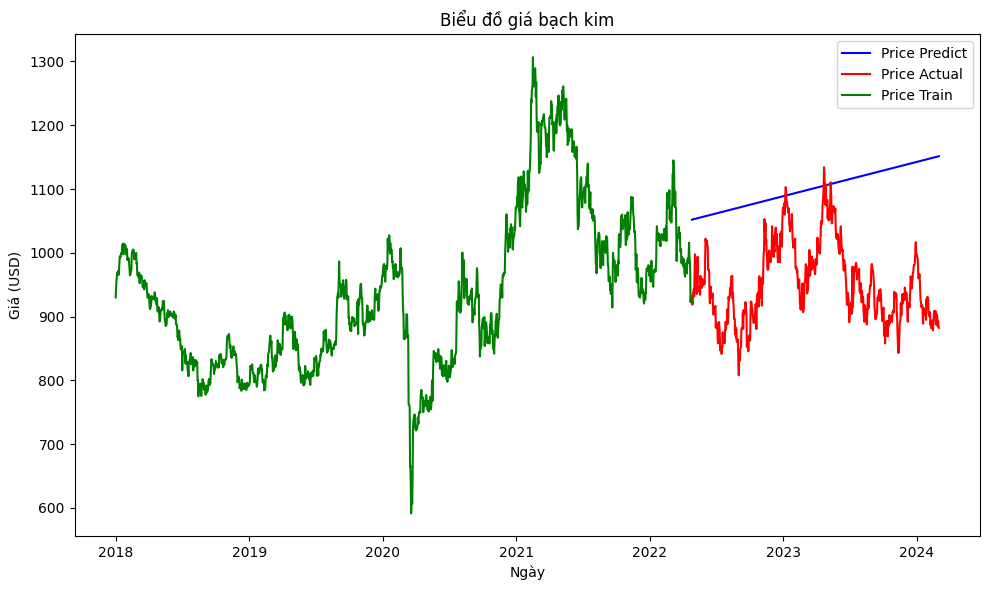

In [6]:
df_platium = pd.read_csv(r'/content/platium_price_2018_2024.csv')
df_platium['Date'] = pd.to_datetime(df_platium['Date'])
df_platium['Day Number'] = df_platium['Date'].rank(method='dense').astype(int)
#df_platium['100 Day Ago Price'] = df_platium['Value (USD per troy ounce)'].shift(100)
#df_platium.columns = ['Date','Price','Day Number', '100 Day Ago Price']
df_platium.columns = ['Date','Price','Day Number']
df_platium = df_platium.dropna()

train_data = df_platium.iloc[:1576]
#train_data.columns = ['Date','Train Price','Day Number', '100 Day Ago Price']
train_data.columns = ['Date','Train Price','Day Number']
test_data = df_platium.iloc[1576:]
#test_data.columns = ['Date','Actual Price','Day Number', '100 Day Ago Price']
test_data.columns = ['Date','Actual Price','Day Number']

#X_train = train_data[['Day Number', '100 Day Ago Price']]
X_train = train_data[['Day Number']]
X_train = sm.add_constant(X_train)
Y_train = train_data['Train Price']
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

#X_test = test_data[['Day Number', '100 Day Ago Price']]
X_test = test_data[['Day Number']]
X_test_array = X_test.to_numpy()
X1 = X_test_array[:, 0]
#X2 = X_test_array[:, 1]
Y_predict = 819.7464 + 0.1473 * X1

test_data.insert(1, "Price Predict", Y_predict)

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Price Predict'], label='Price Predict', color='blue')
plt.plot(test_data['Date'], test_data['Actual Price'], label='Price Actual', color='red')
plt.plot(train_data['Date'], train_data['Train Price'], label='Price Train', color='green')

plt.title('Biểu đồ giá bạch kim')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# Đánh giá mô hình với dữ liệu giá bạch kim
actual_platium = test_data['Actual Price'].values
predict_platium = test_data['Price Predict'].values

rmse_platium = np.sqrt(mean_squared_error(actual_platium, predict_platium))
mape_platium = np.mean(np.abs((actual_platium - predict_platium) / actual_platium)) * 100
mae_platium = mean_absolute_error(actual_platium, predict_platium)

print(f'RMSE: {rmse_platium}')
print(f'MAPE: {mape_platium}%')
print(f'MAE: {mae_platium}')

RMSE: 165.42652643082454
MAPE: 16.318659856075936%
MAE: 150.77905396094673


                            OLS Regression Results                            
Dep. Variable:            Train Price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     3092.
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        09:51:32   Log-Likelihood:                -3773.9
No. Observations:                1576   AIC:                             7552.
Df Residuals:                    1574   BIC:                             7563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3079      0.134     99.457      0.0

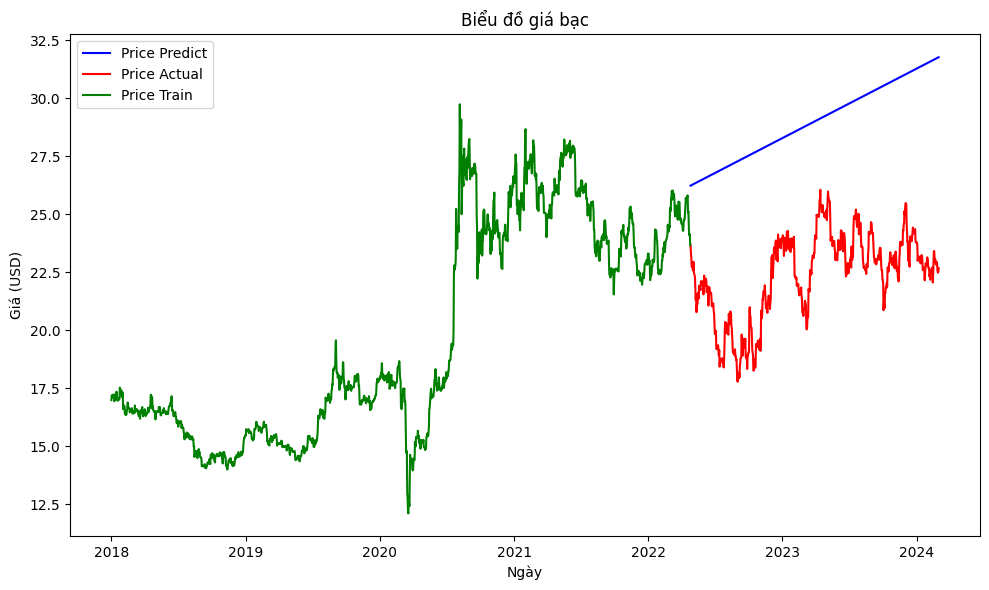

In [9]:
df_silver = pd.read_csv(r'/content/silver_price_2018_2024.csv')
df_silver['Date'] = pd.to_datetime(df_silver['Date'])
df_silver['Day Number'] = df_silver['Date'].rank(method='dense').astype(int)
#df_silver['100 Day Ago Price'] = df_silver['Value (USD per troy ounce)'].shift(100)
#df_silver.columns = ['Date','Price','Day Number', '100 Day Ago Price']
df_silver.columns = ['Date','Price','Day Number']
df_silver = df_silver.dropna()


train_data = df_silver.iloc[:1576]
#train_data.columns = ['Date','Train Price','Day Number', '100 Day Ago Price']
train_data.columns = ['Date','Train Price','Day Number']
test_data = df_silver.iloc[1576:]
#test_data.columns = ['Date','Actual Price','Day Number', '100 Day Ago Price']
test_data.columns = ['Date','Actual Price','Day Number']


#X_train = train_data[['Day Number', '100 Day Ago Price']]
X_train = train_data[['Day Number']]
X_train = sm.add_constant(X_train)
Y_train = train_data['Train Price']
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

#X_test = test_data[['Day Number', '100 Day Ago Price']]
X_test = test_data[['Day Number']]
X_test_array = X_test.to_numpy()
X1 = X_test_array[:, 0]
#X2 = X_test_array[:, 1]
Y_predict = 13.3079 + 0.0082 * X1

test_data.insert(1, "Price Predict", Y_predict)

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Price Predict'], label='Price Predict', color='blue')
plt.plot(test_data['Date'], test_data['Actual Price'], label='Price Actual', color='red')
plt.plot(train_data['Date'], train_data['Train Price'], label='Price Train', color='green')

plt.title('Biểu đồ giá bạc')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
# Đánh giá mô hình với dữ liệu giá bạc
actual_silver = test_data['Actual Price'].values
predict_silver = test_data['Price Predict'].values

rmse_silver = np.sqrt(mean_squared_error(actual_silver, predict_silver))
mape_silver = np.mean(np.abs((actual_silver - predict_silver) / actual_silver)) * 100
mae_silver = mean_absolute_error(actual_silver, predict_silver)

print(f'RMSE: {rmse_silver}')
print(f'MAPE: {mape_silver}%')
print(f'MAE: {mae_silver}')

RMSE: 6.8427466510671096
MAPE: 30.343495624986982%
MAE: 6.653278502662723


# **Thực hiện thuật toán theo tỉ lệ 9:1 (90% train : 10% test)**

                            OLS Regression Results                            
Dep. Variable:            Train Price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     5893.
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        09:52:20   Log-Likelihood:                -12715.
No. Observations:                2026   AIC:                         2.543e+04
Df Residuals:                    2024   BIC:                         2.544e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1259.5337      5.719    220.226      0.0

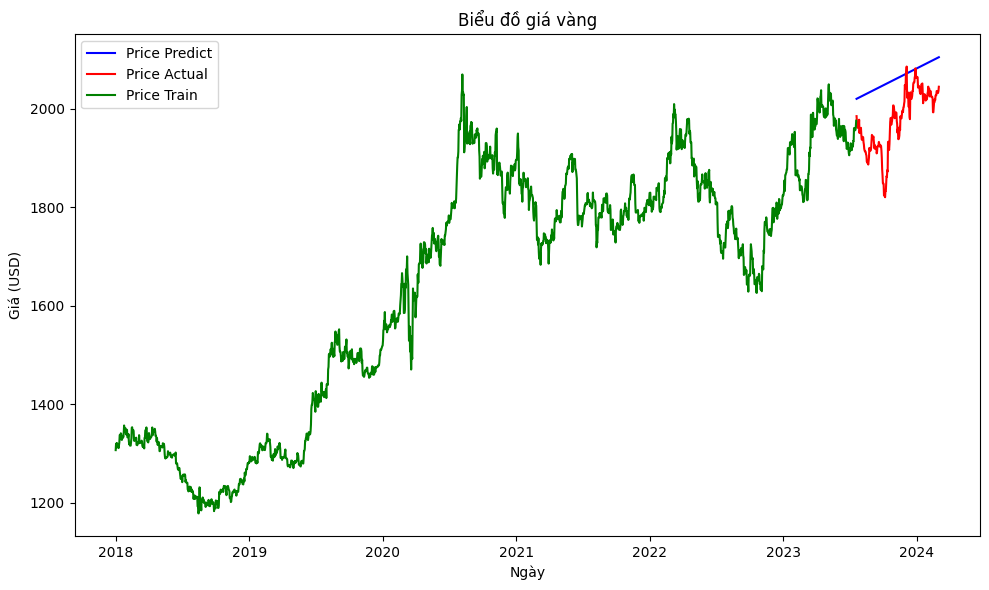

In [12]:
df_gold = pd.read_csv(r'/content/gold_price_2018_2024.csv')

df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold['Day Number'] = df_gold['Date'].rank(method='dense').astype(int)
#df_gold['100 Day Ago Price'] = df_gold['Value (USD per troy ounce)'].shift(100)
#df_gold.columns = ['Date','Price','Day Number', '100 Day Ago Price']
df_gold.columns = ['Date','Price','Day Number']
df_gold = df_gold.dropna()

train_data = df_gold.iloc[:2026]
#train_data.columns = ['Date','Train Price','Day Number', '100 Day Ago Price']
train_data.columns = ['Date','Train Price','Day Number']
test_data = df_gold.iloc[2026:]
#test_data.columns = ['Date','Actual Price','Day Number', '100 Day Ago Price']
test_data.columns = ['Date','Actual Price','Day Number']

#X_train = train_data[['Day Number', '100 Day Ago Price']]
X_train = train_data[['Day Number']]
X_train = sm.add_constant(X_train)
Y_train = train_data['Train Price']
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

#X_test = test_data[['Day Number', '100 Day Ago Price']]
X_test = test_data[['Day Number']]
X_test_array = X_test.to_numpy()
X1 = X_test_array[:, 0]
#X2 = X_test_array[:, 1]

Y_predict = 1259.5337 + 0.3752 * X1
test_data.insert(1, "Price Predict", Y_predict)

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Price Predict'], label='Price Predict', color='blue')
plt.plot(test_data['Date'], test_data['Actual Price'], label='Price Actual', color='red')
plt.plot(train_data['Date'], train_data['Train Price'], label='Price Train', color='green')

plt.title('Biểu đồ giá vàng')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
# Đánh giá mô hình với dữ liệu giá vàng
actual_gold = test_data['Actual Price'].values
predict_gold = test_data['Price Predict'].values

rmse_gold = np.sqrt(mean_squared_error(actual_gold, predict_gold))
mape_gold = np.mean(np.abs((actual_gold - predict_gold) / actual_gold)) * 100
mae_gold = mean_absolute_error(actual_gold, predict_gold)

print(f'RMSE: {rmse_gold}')
print(f'MAPE: {mape_gold}%')
print(f'MAE: {mae_gold}')

RMSE: 97.54129757803447
MAPE: 4.436865792201377%
MAE: 86.25519764159282


                            OLS Regression Results                            
Dep. Variable:            Train Price   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     536.5
Date:                Wed, 15 May 2024   Prob (F-statistic):          1.77e-105
Time:                        09:53:15   Log-Likelihood:                -12195.
No. Observations:                2026   AIC:                         2.439e+04
Df Residuals:                    2024   BIC:                         2.440e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        853.8236      4.425    192.957      0.0

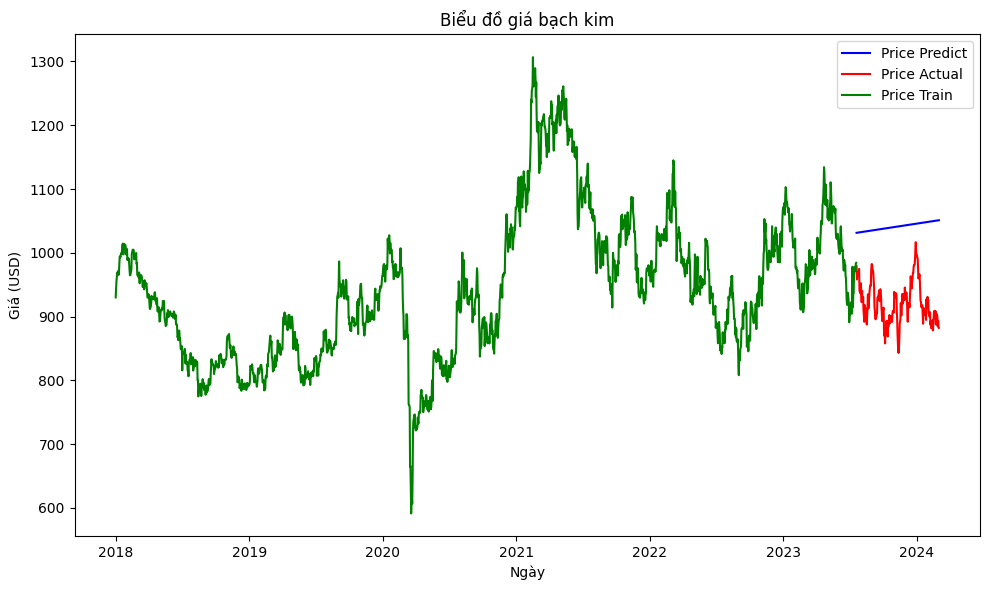

In [15]:
df_platium = pd.read_csv(r'/content/platium_price_2018_2024.csv')
df_platium['Date'] = pd.to_datetime(df_platium['Date'])
df_platium['Day Number'] = df_platium['Date'].rank(method='dense').astype(int)
#df_platium['100 Day Ago Price'] = df_platium['Value (USD per troy ounce)'].shift(100)
#df_platium.columns = ['Date','Price','Day Number', '100 Day Ago Price']
df_platium.columns = ['Date','Price','Day Number']
df_platium = df_platium.dropna()

train_data = df_platium.iloc[:2026]
#train_data.columns = ['Date','Train Price','Day Number', '100 Day Ago Price']
train_data.columns = ['Date','Train Price','Day Number']
test_data = df_platium.iloc[2026:]
#test_data.columns = ['Date','Actual Price','Day Number', '100 Day Ago Price']
test_data.columns = ['Date','Actual Price','Day Number']

#X_train = train_data[['Day Number', '100 Day Ago Price']]
X_train = train_data[['Day Number']]
X_train = sm.add_constant(X_train)
Y_train = train_data['Train Price']
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

#X_test = test_data[['Day Number', '100 Day Ago Price']]
X_test = test_data[['Day Number']]
X_test_array = X_test.to_numpy()
X1 = X_test_array[:, 0]
#X2 = X_test_array[:, 1]
Y_predict = 853.8236 + 0.0876 * X1

test_data.insert(1, "Price Predict", Y_predict)

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Price Predict'], label='Price Predict', color='blue')
plt.plot(test_data['Date'], test_data['Actual Price'], label='Price Actual', color='red')
plt.plot(train_data['Date'], train_data['Train Price'], label='Price Train', color='green')

plt.title('Biểu đồ giá bạch kim')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
# Đánh giá mô hình với dữ liệu giá bạch kim
actual_platium = test_data['Actual Price'].values
predict_platium = test_data['Price Predict'].values

rmse_platium = np.sqrt(mean_squared_error(actual_platium, predict_platium))
mape_platium = np.mean(np.abs((actual_platium - predict_platium) / actual_platium)) * 100
mae_platium = mean_absolute_error(actual_platium, predict_platium)

print(f'RMSE: {rmse_platium}')
print(f'MAPE: {mape_platium}%')
print(f'MAE: {mae_platium}')

RMSE: 124.32467057133499
MAPE: 13.127567910046706%
MAE: 119.67985846681424


                            OLS Regression Results                            
Dep. Variable:            Train Price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     1919.
Date:                Wed, 15 May 2024   Prob (F-statistic):          2.10e-295
Time:                        09:53:53   Log-Likelihood:                -5124.8
No. Observations:                2026   AIC:                         1.025e+04
Df Residuals:                    2024   BIC:                         1.026e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1063      0.135    111.882      0.0

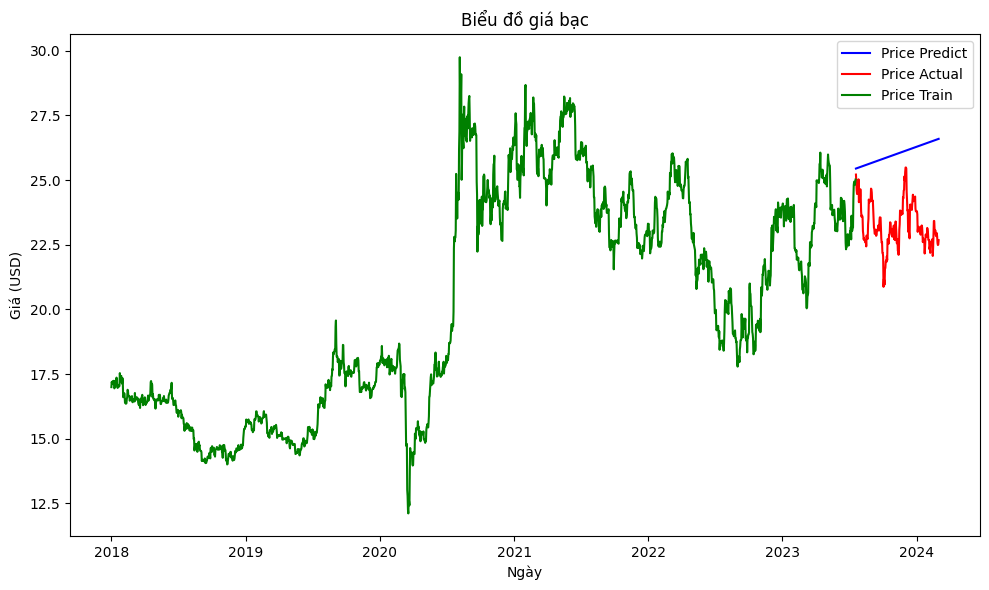

In [18]:
df_silver = pd.read_csv(r'/content/silver_price_2018_2024.csv')
df_silver['Date'] = pd.to_datetime(df_silver['Date'])
df_silver['Day Number'] = df_silver['Date'].rank(method='dense').astype(int)
#df_silver['100 Day Ago Price'] = df_silver['Value (USD per troy ounce)'].shift(100)
#df_silver.columns = ['Date','Price','Day Number', '100 Day Ago Price']
df_silver.columns = ['Date','Price','Day Number']
df_silver = df_silver.dropna()


train_data = df_silver.iloc[:2026]
#train_data.columns = ['Date','Train Price','Day Number', '100 Day Ago Price']
train_data.columns = ['Date','Train Price','Day Number']
test_data = df_silver.iloc[2026:]
#test_data.columns = ['Date','Actual Price','Day Number', '100 Day Ago Price']
test_data.columns = ['Date','Actual Price','Day Number']


#X_train = train_data[['Day Number', '100 Day Ago Price']]
X_train = train_data[['Day Number']]
X_train = sm.add_constant(X_train)
Y_train = train_data['Train Price']
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

#X_test = test_data[['Day Number', '100 Day Ago Price']]
X_test = test_data[['Day Number']]
X_test_array = X_test.to_numpy()
X1 = X_test_array[:, 0]
#X2 = X_test_array[:, 1]
Y_predict = 15.1063 + 0.0051 * X1

test_data.insert(1, "Price Predict", Y_predict)

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Price Predict'], label='Price Predict', color='blue')
plt.plot(test_data['Date'], test_data['Actual Price'], label='Price Actual', color='red')
plt.plot(train_data['Date'], train_data['Train Price'], label='Price Train', color='green')

plt.title('Biểu đồ giá bạc')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
# Đánh giá mô hình với dữ liệu giá bạc
actual_silver = test_data['Actual Price'].values
predict_silver = test_data['Price Predict'].values

rmse_silver = np.sqrt(mean_squared_error(actual_silver, predict_silver))
mape_silver = np.mean(np.abs((actual_silver - predict_silver) / actual_silver)) * 100
mae_silver = mean_absolute_error(actual_silver, predict_silver)

print(f'RMSE: {rmse_silver}')
print(f'MAPE: {mape_silver}%')
print(f'MAE: {mae_silver}')

RMSE: 2.925499037003551
MAPE: 12.027797205456999%
MAE: 2.760874194336283
